In [1]:
# 作業：在鐵達尼資料集中， 透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train .csv 中的 age 的遺失值進行補值。
# step1：觀察 Age 和 Pclass 和 Sex 是否有關連性?
# step2：如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
#print(sklearn.__version__)
%matplotlib inline
import warnings
warnings.filterwarnings( 'ignore' )

#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
data = pd.read_csv("Titanic_train.csv")
#印出 Titanic_train.csv 看資料的型態
print(data.info())
#印出 Titanic_train.csv 前五筆看資料內容
display(data.head(5))
#計算 Age 遺失個數
print('Age 遺失個數=',data['Age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Age 遺失個數= 177


,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


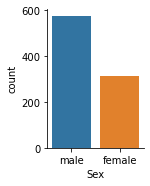

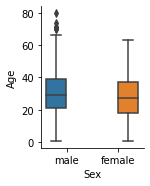

In [2]:
# 重新選取需要的資料
train_data = pd.read_csv('Titanic_train.csv',usecols=['Age','Sex','Pclass'])

# 印出重新選取前五筆看資料內容
display(train_data.head(5))
            
# 查看已知資料 Sex 個數
g = sns.catplot("Sex", data=train_data, kind="count", height=2.5, aspect=.8)

# 查看 Age 與 Sex 是否有差異
g = sns.catplot(x="Sex",y="Age", hue="Sex", data=train_data, kind="box", height=2.5, aspect=.8)

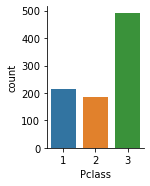

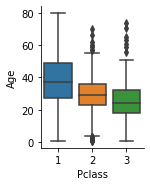

In [3]:
# 查看已知資料 Pclass 個數
g = sns.catplot("Pclass", data=train_data, kind="count", height=2.5, aspect=.8)

# 先看 Age 與 Pclass 是否有關連性
g = sns.catplot("Pclass",'Age', data=train_data, kind="box", height=2.5, aspect=.8)

In [4]:
# 將原資料複製出來
knn_data = train_data
# Step1：離散轉連續型資料
#透過 preprocessing 轉換
from sklearn import preprocessing
#印出 knn_data Age 欄位是空值的資料內容
nan_age = pd.isnull(knn_data['Age'])
display(knn_data[nan_age])

,Pclass,Sex,Age
5,3,male,NaN
17,2,male,NaN
19,3,female,NaN
26,3,male,NaN
28,3,female,NaN
...,...,...,...
859,3,male,NaN
863,3,female,NaN
868,3,male,NaN
878,3,male,NaN


In [5]:
#下面兩行程式，讓 Male=1, FeMale=0.
le = preprocessing.LabelEncoder()
knn_data['Sex']=le.fit_transform(knn_data['Sex'])
display(knn_data.head(5))

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [6]:
# Step 2 :計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(knn_data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [7]:
# Step3: 透過 KNN 進行補值
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(knn_data))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,26.0
889,1.0,1.0,26.0
